In [3]:
from etils import epath
import numpy as np
from matplotlib import pyplot as plt
import torch
import torchio as tio

from preprocessor.images import multi_modal_processor
import terminology as term
import codebase_settings as cbs

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<h3> Preprossing data </h3>

In [4]:
data_folder = cbs.CODEBASE_PATH / 'preprocessor' / 'images' / 'test_data'
hecktor_processor = multi_modal_processor.MultiModalProcessor(
    data_folder=data_folder, phase=term.Phase.TRAIN, modalities=[term.Modality.CT, term.Modality.PET], reference=term.Modality.PET)

<h> Original data </h>

In [5]:
subject = hecktor_processor.create_subject('CHUM-024')

(1, 512, 512, 237)


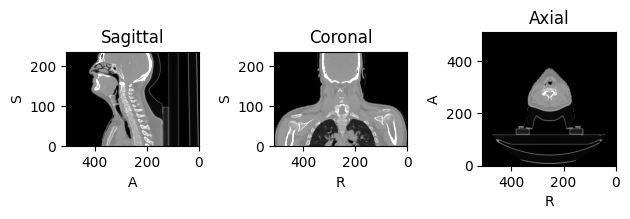

In [10]:
print(subject['CT'].shape)
subject['CT'].plot()

(1, 144, 144, 87)


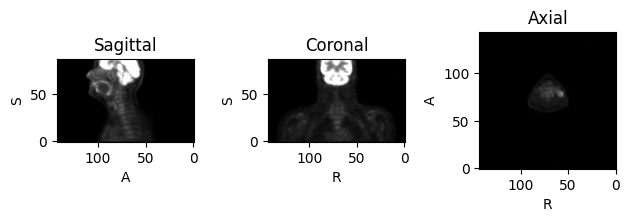

In [11]:
print(subject['PT'].shape)
subject['PT'].plot()

(1, 512, 512, 237)


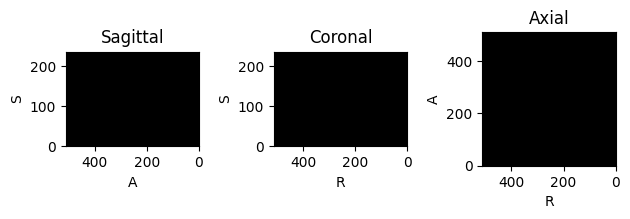

In [12]:
print(subject['LABEL'].shape)
subject['LABEL'].plot()

<h> Resample to reference (PET) </h>

In [13]:
resampled_subject = hecktor_processor.resample_to_reference(subject=subject, xy_size=(128, 128))

Resample CHUM-024


(1, 128, 128, 87)
(4.5, 4.5, 4.0)
(4.5, 4.5, 4.0)


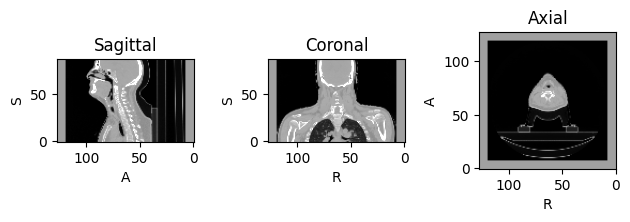

In [15]:
print(resampled_subject['CT'].shape)
print(resampled_subject['CT'].spacing)
print(resampled_subject['PT'].spacing)
resampled_subject['CT'].plot()

<h> Apply transformation: normalization and augmentation:

CT: Clamp + Intensity rescale

PET: Histogram Standardization + ZNormalization </h> 

In [16]:
transform_dict = {'flip': {'p': 1.0, 'axes': ('LR', 'AP')}}
transformation = hecktor_processor.create_transformation(transform_keys=transform_dict)
final_subject = transformation(resampled_subject)

max: 1.0
min: -1.0


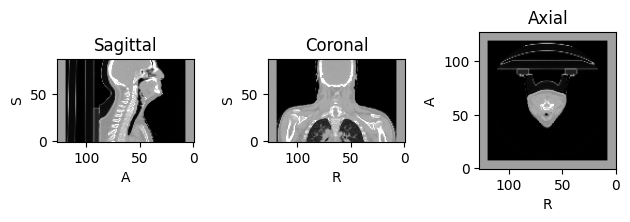

In [18]:
ct_data = final_subject['CT'].numpy()
print(f'max: {np.max(ct_data)}')
print(f'min: {np.min(ct_data)}')
final_subject['CT'].plot()

<h> Create fake data for unittest </h>

In [ ]:
a_slice = torch.Tensor([[1, 2, 0, 0], [2, 4, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]])
print(a_slice.shape)
a_img = torch.stack([a_slice, a_slice, a_slice])
print(a_img.shape)
a_img = torch.swapaxes(a_img, 0, 2)
print(a_img.shape)
a_tensor = torch.stack([a_img, a_img])
print(a_tensor.shape)
# torch.save(a_tensor, '/workspace/ro_codebase/projects/hecktor2022/test_data/train/images/case1_input.pt')

In [ ]:
a_slice = torch.Tensor([[1, 1, 0, 0], [1, 1, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]])
print(a_slice.shape)
a_img = torch.stack([a_slice, a_slice, a_slice])
print(a_img.shape)
a_img = torch.swapaxes(a_img, 0, 2)
print(a_img.shape)
a_tensor = torch.unsqueeze(a_img, dim=0)
print(a_tensor.shape)
torch.save(a_tensor, '/workspace/ro_codebase/projects/hecktor2022/test_data/train/labels/case1_label.pt')

<h> Data preprocessing </h>

In [ ]:
# patient = 'CHUM-002'
patient = 'MDA-048'
subject = tio.Subject(
    CT=tio.ScalarImage(data_folder / 'original' / 'images' / f'{patient}__CT.nii.gz'),
    PT=tio.ScalarImage(data_folder / 'original' / 'images' / f'{patient}__PT.nii.gz'),
    ID=patient
)

In [ ]:
type(subject['CT'])

In [ ]:
resampled_ct = train_image_op.resample(ct, pet.affine, (128, 128, 91))
resampled_ct.affine

In [ ]:
print(ct.affine)
print(resampled_ct.affine)
print(pet.affine)

In [ ]:
# Don't run this line. 3D image with 512 x 512 size will take for ever in this approach
viewer = view_3d.Viewer3D()
viewer.visualize_multi_volumes([input_data[0, :, :].numpy()])

In [ ]:
nslice = 40

resampled_img = resampled_ct.get_fdata()
plt.imshow(resampled_img[:, :, nslice])
plt.imshow(imgs[1][:, :, nslice], alpha=0.8)

In [ ]:
from pathlib import Path

In [ ]:
a_file = Path('/mnt/cds/chum-002.nii.gz')
a_file.stem.split('.')[0]

In [ ]:
list1 = [2]
list2 = [3]
list1+list2

In [ ]:
from projects.hecktor2022 import preprocessor
from projects.hecktor2022 import terminology as term

In [ ]:
data_path = cbs.DATA_PATH / 'HECKTOR2022'
processor = preprocessor.HecktorProcessor(data_path)

In [ ]:
input_data, label_data = processor.process_a_patient(phase=term.Phase.TRAIN, patient='CHUM-001')

In [ ]:
label_data.shape

In [ ]:
nslice = 40

plt.imshow(input_data[0, :, :, nslice])
plt.imshow(input_data[1, :, :, nslice], alpha=0.8)

In [ ]:
import csv
file_path = epath.Path('/rodata/mnradonc_dev/m195381/data/HECKTOR2022')
file_name = 'hecktor2022_patients_in_valid.csv'
with open(file_path / file_name) as f:
    patients = list(csv.reader(f, delimiter=','))

In [ ]:
landmarks = np.load('/workspace/ro_codebase/preprocessor/images/test_data/PT_landmarks.npy')
landmarks

In [ ]:
lbl = torch.load(str(data_folder / 'subvolumesx128x128x32' / 'train' / 'labels' / 'MDA-084_0_label.pt'))
img = torch.load(str(data_folder / 'subvolumesx128x128x32' / 'train' / 'images' / 'MDA-084_0_input.pt'))

In [ ]:
img.shape

In [ ]:
a_tensor = torch.load('/workspace/ro_codebase/projects/hecktor2022/test_data/images/case1_input.pt')
plt.imshow(a_tensor[0, :, :])

In [ ]:
a_slice

In [ ]:

mask = a_slice > 0
mask.int()